# Spaceship Titanic
### A kaggle competition
In this notebook we will have a take at the [Spaceship Titanic competition](https://www.kaggle.com/competitions/spaceship-titanic) by Kaggle. 
We are provided with a dataset of fake data about passengers on a spaceship that disappeared in space. Half of its passenger vanished in an other dimension.
We are tasked with predicting the transportation of passengers to an other dimension.  
The data is split in two parts : train and test. The test set has no Transported category. We're supposed to make our predictions on the test set, make a csv of our test predictions and upload it to kaggle, which will evaluate our test predictions and give us a score.

# Table of Contents

## Contents

1. [Imports](#Imports)
2. [Data visualization](#Data-visualization)
3. [Feature engineering](#Feature-engineering)
4. [Encoding feature values](#Encoding-feature-values)
5. [Modeling](#Modeling)
6. [Results](#Results)

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

plt.style.use('dark_background')

# Data visualization

We'll first visualize the data before manipulating the data.  
Let's open the dataset. We'll combine both the training and the test data, so that our data manipulations and feature engineering applies to both the datasets.

In [2]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df,df_test])
df

/usr/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/lib/python3.11/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [3]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

In [4]:
df.shape

(12970, 14)

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

Let's check the distributions of the transported classes in relation to the features

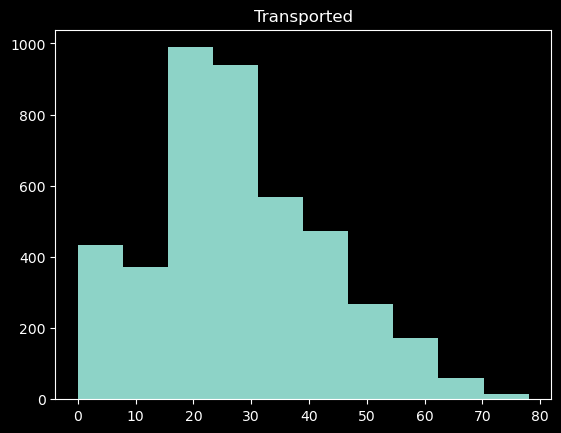

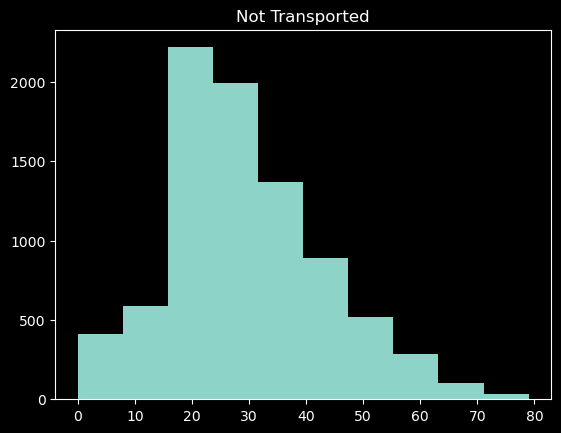

In [7]:
plt.hist(df[df['Transported']==True]['Age'])
plt.title("Transported")
plt.show()
plt.hist(df[df['Transported']!=True]['Age'])
plt.title("Not Transported")
plt.show()

A higher percentage of young people were transported among the Transported people.

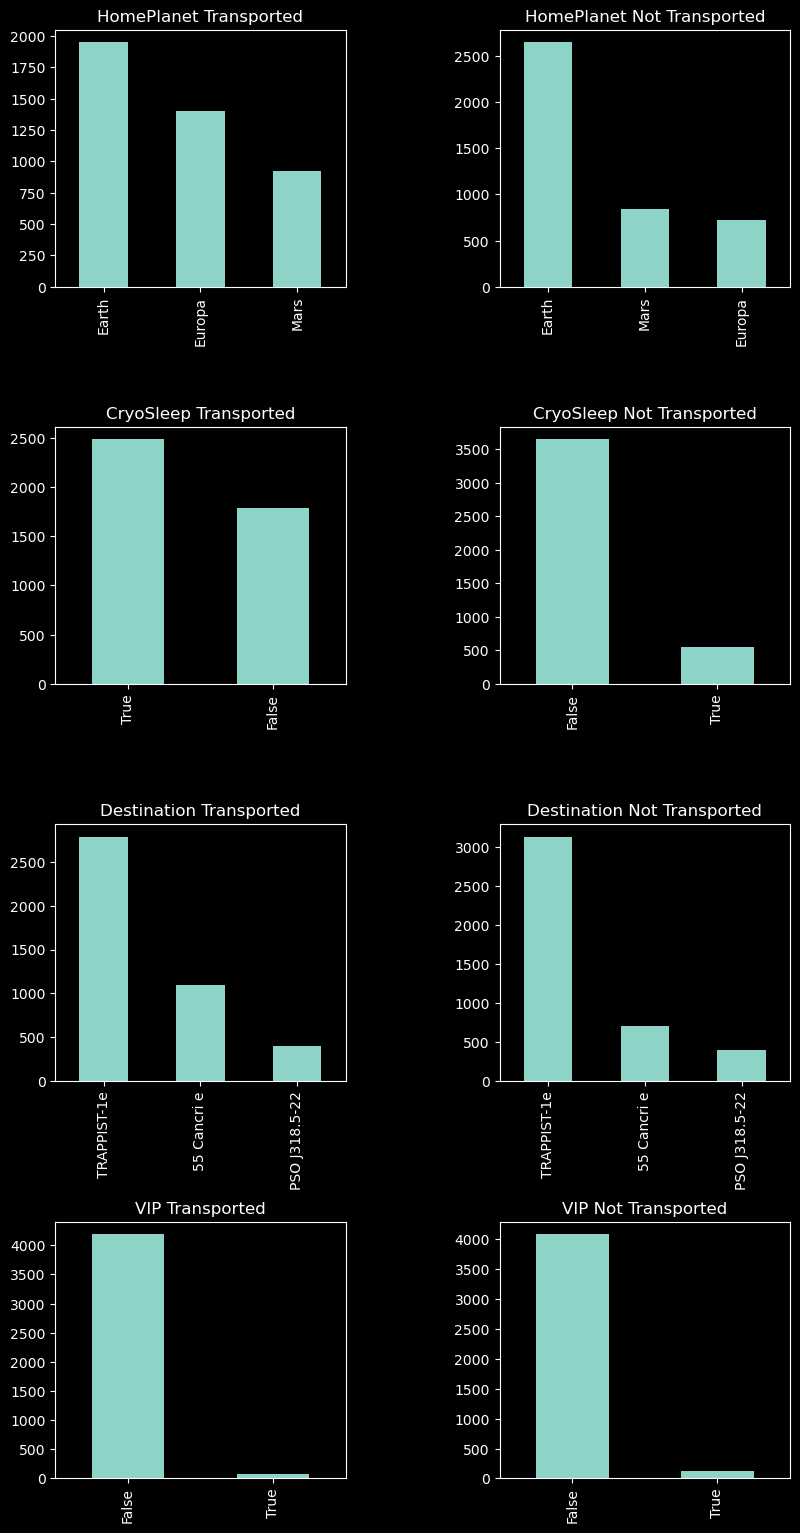

In [8]:
columns = ['HomePlanet','CryoSleep','Destination','VIP']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,17))
fig.tight_layout(pad=8)
for i,col in enumerate(columns):
    axs[i%4,0].set_title(col+" Transported")
    df[df['Transported'] == True][col].value_counts().plot(kind='bar', ax=axs[i%4,0])
    
    axs[i%4,1].set_title(col+" Not Transported")
    df[df['Transported'] == False][col].value_counts().plot(kind='bar', ax=axs[i%4,1])

plt.show()

People in cryosleep were very less likely to be transported  
VIP didn't change the proportions of transported people.  

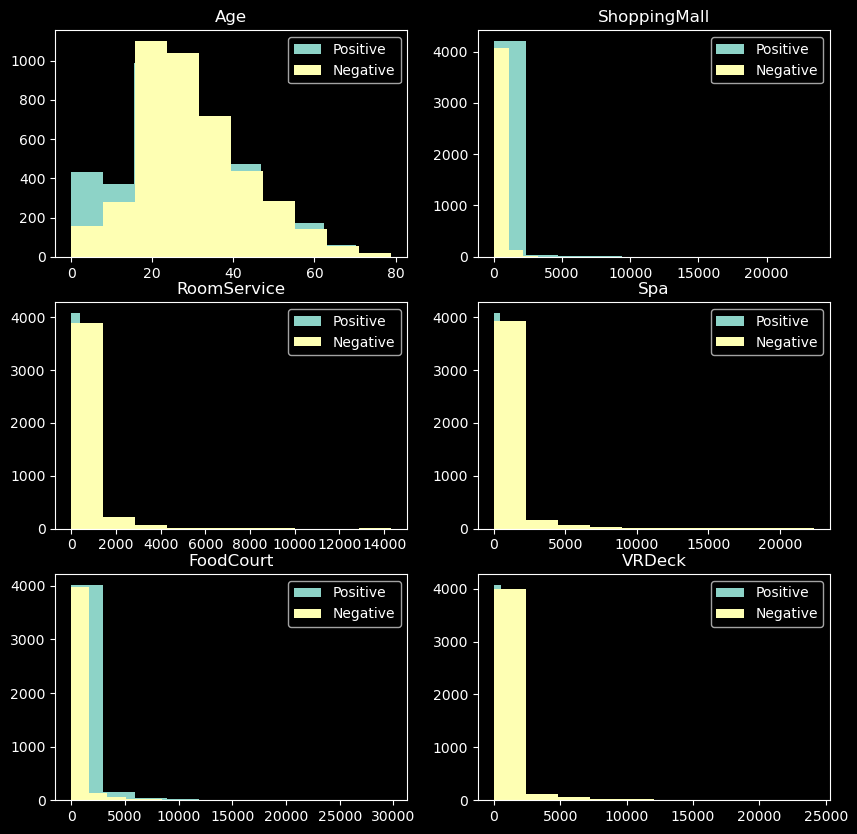

In [9]:
columns = ['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
for i,col in enumerate(columns):
    pos = df[df['Transported'] == 1][col]
    neg = df[df['Transported'] == 0][col]
    axs[i%3,i//3].hist(pos, label="Positive")
    axs[i%3,i//3].hist(neg, label="Negative")
    axs[i%3,i//3].legend()
    axs[i%3,i//3].set_title(col)

plt.show()

Most of people didn't spend much on luxury services. There were more children that were transported though.

# Feature engineering

In [10]:
df.reset_index()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [11]:
df = df.reset_index().drop('index', axis=1)

In [12]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [14]:
df['Group'] = df['PassengerId'].str.split('_', expand=True)[0].astype(str)

In [15]:
df['Cabin']

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966         NaN
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [16]:
df[['Deck','CabinNumber','Side']] = df['Cabin'].str.split('/', expand=True)

In [17]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,CabinNumber,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S


In [18]:
df['CabinNumber'] = df['CabinNumber'].astype(int, errors='ignore')

In [19]:
df['LastName'] = df['Name'].str.split(' ', expand=True)[1]

In [20]:
df.shape

(12970, 19)

In [21]:
df.set_index('PassengerId', inplace=True)

In [22]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,CabinNumber,Side,LastName
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P,Ofracculy
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S,Vines
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S,Susent
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S,Susent
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S,Santantines


In [23]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [24]:
df.isna().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
Group              0
Deck             299
CabinNumber      299
Side             299
LastName         294
dtype: int64

In [25]:
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CryoSleep']].groupby('CryoSleep').value_counts()

CryoSleep  RoomService  FoodCourt  ShoppingMall  Spa     VRDeck
False      0.0          0.0        0.0           0.0     0.0        667
                                   717.0         0.0     0.0          4
                                   885.0         0.0     0.0          3
                                   0.0           0.0     908.0        3
                        717.0      0.0           0.0     0.0          2
                                                                   ... 
                        2177.0     0.0           1097.0  144.0        1
                        2161.0     0.0           4702.0  78.0         1
                        2154.0     0.0           9655.0  859.0        1
           13.0         0.0        2.0           673.0   3.0          1
True       0.0          0.0        0.0           0.0     0.0       4068
Length: 6569, dtype: int64

Somebody in CryoSleep couldn't spend money on the starship, so NaN values in the luxuries columns

In [26]:
df[df['Age'] < 13 ][['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

Children couldn't spend money either, so it goes the same for them.

In [27]:
df["RoomService"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["RoomService"])
df["FoodCourt"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["FoodCourt"])
df["ShoppingMall"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["ShoppingMall"])
df["Spa"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["Spa"])
df["VRDeck"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["VRDeck"])

In [28]:
df.isna().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      162
FoodCourt        171
ShoppingMall     163
Spa              166
VRDeck           150
Name             294
Transported     4277
Group              0
Deck             299
CabinNumber      299
Side             299
LastName         294
dtype: int64

Then we check for outliers.

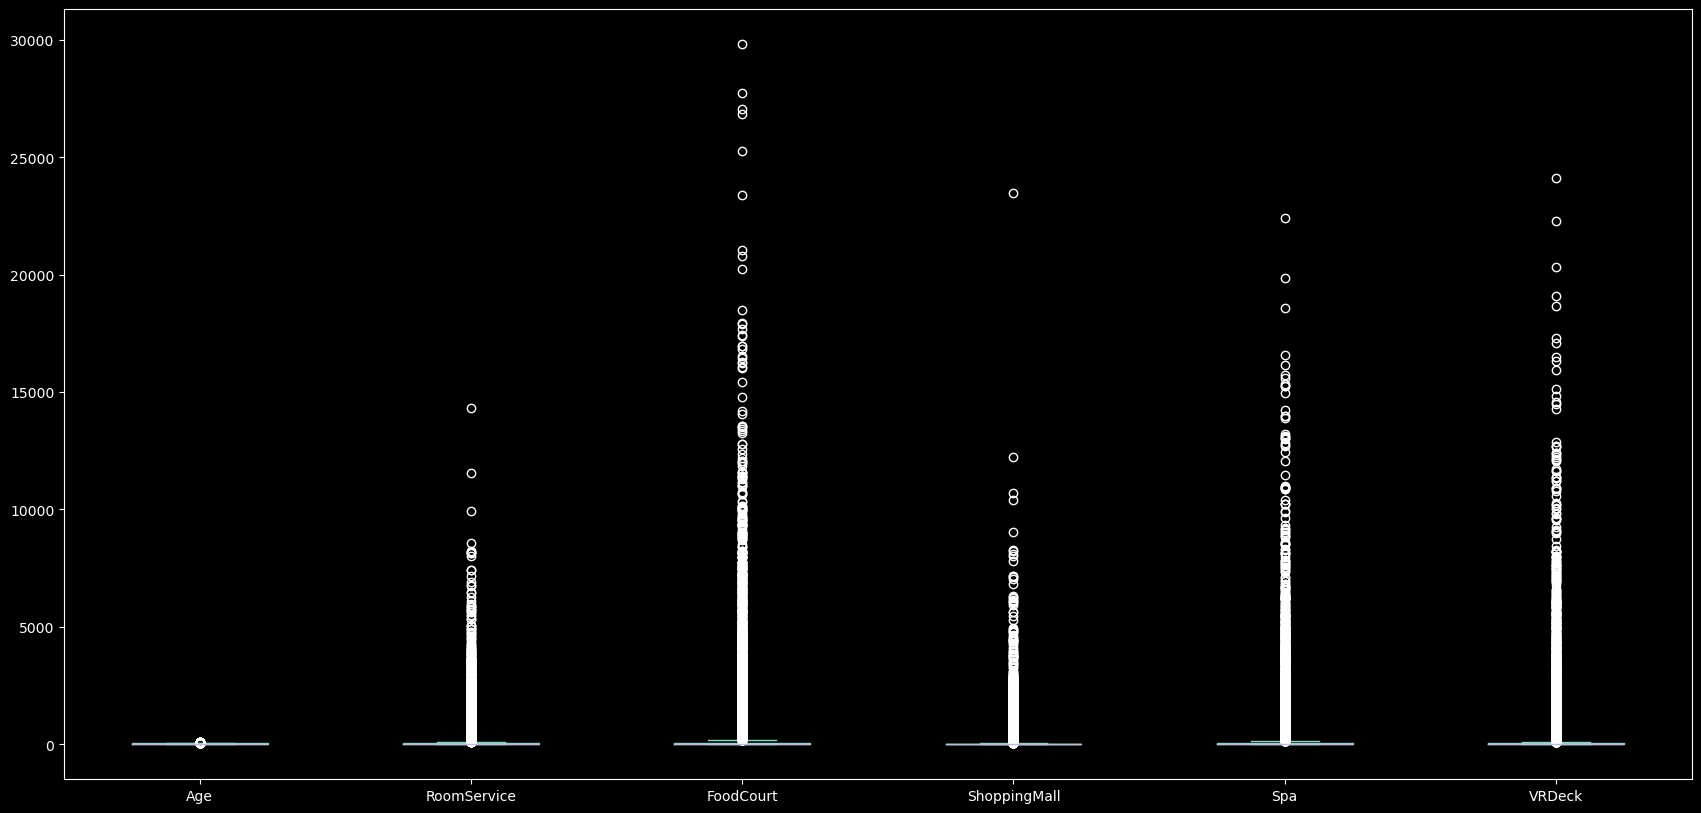

In [29]:
df.plot.box(figsize=(21,10))
plt.show()

We then remap the outlier values to the 99th quantile.

In [30]:
def quantile_remap(df):
    quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(0.99)
    
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        print(num_values)
        df[num_column] = num_values

In [31]:
quantile_remap(df)
df['RoomService'].value_counts()

[  0. 109.  43. ...   0.   0.   0.]
[   0.    9. 3576. ...    0. 2680.    0.]
[ 0. 25.  0. ...  0.  0.  0.]
[   0.    549.   5390.88 ...    0.      0.      0.  ]
[  0.  44.  49. ...   0. 523.   0.]


0.00       8404
1.00        185
3001.65     129
2.00        113
3.00         89
           ... 
1307.00       1
971.00        1
1528.00       1
859.00        1
652.00        1
Name: RoomService, Length: 1454, dtype: int64

We create three more categories that sums the regular spendings and the luxury ones.

In [32]:
df["Regular"] = df["FoodCourt"] + df["ShoppingMall"] 
df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

We also check if the person is alone in his/her group

In [33]:
is_alone = df.reset_index().groupby('Group')['PassengerId'].size() == 1

In [34]:
is_alone = is_alone.reset_index().rename(columns = {"PassengerId": "IsAlone"})
is_alone

,Group,IsAlone
0,0001,True
1,0002,True
2,0003,False
3,0004,True
4,0005,True
...,...,...
9275,9276,True
9276,9277,True
9277,9278,True
9278,9279,True


In [35]:
df = df.reset_index().merge(is_alone[["Group", "IsAlone"]], how = 'left', on = ['Group']).set_index('PassengerId')

In [36]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,Group,Deck,CabinNumber,Side,LastName,Regular,Luxury,TotalSpendings,IsAlone
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.00,...,False,0001,B,0,P,Ofracculy,0.0,0.00,0.00,True
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.00,...,True,0002,F,0,S,Vines,34.0,702.00,736.00,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,5390.88,...,False,0003,A,0,S,Susent,3576.0,5482.88,9058.88,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.00,...,False,0003,A,0,S,Susent,1654.0,3522.00,5176.00,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.00,...,True,0004,F,1,S,Santantines,221.0,870.00,1091.00,True


Cabin and Name are useless now. So we drop them.

In [37]:
df = df.drop(['Cabin', 'Name'],axis=1)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Deck,CabinNumber,Side,LastName,Regular,Luxury,TotalSpendings,IsAlone
PassengerId,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.00,0.0,False,0001,B,0,P,Ofracculy,0.0,0.00,0.00,True
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.00,44.0,True,0002,F,0,S,Vines,34.0,702.00,736.00,True
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,5390.88,49.0,False,0003,A,0,S,Susent,3576.0,5482.88,9058.88,False
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.00,193.0,False,0003,A,0,S,Susent,1654.0,3522.00,5176.00,False
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.00,2.0,True,0004,F,1,S,Santantines,221.0,870.00,1091.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.00,0.0,NaN,9266,G,1496,S,Peter,0.0,0.00,0.00,False
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.00,144.0,NaN,9269,NaN,NaN,NaN,Scheron,864.0,154.00,1018.00,True
9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.00,0.0,NaN,9271,D,296,P,Pore,0.0,0.00,0.00,True


In [38]:
df.dtypes

HomePlanet         object
CryoSleep          object
Destination        object
Age               float64
VIP                object
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
Transported        object
Group              object
Deck               object
CabinNumber        object
Side               object
LastName           object
Regular           float64
Luxury            float64
TotalSpendings    float64
IsAlone              bool
dtype: object

We have many object types in our dataframe. We need to convert these values.  
Let's start by converting the cabin number.

In [39]:
df['CabinNumber'] = df['CabinNumber'].astype(int, errors='ignore')
df['CabinNumber']

PassengerId
0001_01       0
0002_01       0
0003_01       0
0003_02       0
0004_01       1
           ... 
9266_02    1496
9269_01     NaN
9271_01     296
9273_01     297
9277_01    1498
Name: CabinNumber, Length: 12970, dtype: object

Some values are still nan in the dataframe, I'll first encode the values into numbers, then fill the nan values with the encoded features.

# Encoding feature values

We will now encode the string values to numerical values, using :
- the LabelEncoder for the label (Transported column)
- the OrdinalEncoder for non numerical values
  
OrdinalEncoder is usually used with data that can be ordered. In my case, because I want to use a RandomForest, I figured I can allow myself to use OrdinalEncoder for every categorical feature.

In [40]:
label_enc = LabelEncoder()
ord_enc = OrdinalEncoder()
oh_enc = OneHotEncoder(drop='first', sparse_output=False)

LabelEncoder encodes Nan values. However we need to keep them, in order to test them at the end. So we'll add an other category that will encode nan as well.

In [41]:
label_enc.fit([True,False, np.NAN])

LabelEncoder()

In [42]:
label_enc.classes_, label_enc.transform(label_enc.classes_)

(array([ 0.,  1., nan]), array([0, 1, 2]))

So the nan values (the values from the testing dataset) are labeled as 2.

In [43]:
df['Transported'] = label_enc.transform(df['Transported'])

Then we'll encode and transform with the ordinal encoder to encode the categorical values into numbers. Because I plan on making a Random Forest, I allow myself to use the ordinal encoder also for unordered values, as they'll just be grouped in each node and compared

In [44]:
df[['HomePlanet','CryoSleep','Destination','LastName','Deck','Side','VIP','IsAlone']] = ord_enc.fit_transform(df[['HomePlanet','CryoSleep','Destination','LastName','Deck','Side','VIP','IsAlone']])

We finally split the dataframe back into the test and train sets.

In [45]:
df_test = df[df['Transported'] == 2].copy()

In [46]:
df_train = df[df['Transported'] != 2].copy()

In [47]:
df_train.shape

(8693, 20)

In [48]:
df_test.shape

(4277, 20)

We drop the transported column in the test dataframe

In [49]:
df_test.drop('Transported',axis=1,inplace=True)

Using kNNImputer, we can impute NaN values using the kNN algorithm.

In [50]:
imp = KNNImputer()

In [51]:
cols_wo_class = list(df_train.columns)
cols_wo_class.remove('Transported')

imp.fit(df.drop('Transported',axis=1))
df_train[cols_wo_class] = imp.transform(df_train[cols_wo_class])
df_test[cols_wo_class] = imp.transform(df_test[cols_wo_class])

In [52]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Deck,CabinNumber,Side,LastName,Regular,Luxury,TotalSpendings,IsAlone
PassengerId,,,,,,,,,,,,,,,,,,,,
0001_01,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.00,0.0,0,1.0,1.0,0.0,0.0,1551.0,0.0,0.00,0.00,1.0
0002_01,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.00,44.0,1,2.0,5.0,0.0,1.0,2289.0,34.0,702.00,736.00,1.0
0003_01,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,5390.88,49.0,0,3.0,0.0,0.0,1.0,2153.0,3576.0,5482.88,9058.88,0.0
0003_02,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.00,193.0,0,3.0,0.0,0.0,1.0,2153.0,1654.0,3522.00,5176.00,0.0
0004_01,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.00,2.0,1,4.0,5.0,1.0,1.0,1924.0,221.0,870.00,1091.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.00,74.0,0,9276.0,0.0,98.0,0.0,1535.0,6819.0,1717.00,8536.00,1.0
9278_01,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.00,0.0,0,9278.0,6.0,1499.0,1.0,1452.0,0.0,0.00,0.00,1.0
9279_01,0.0,0.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.00,0.0,1,9279.0,6.0,1500.0,1.0,512.0,1872.0,1.00,1873.00,1.0


# Modeling

Let's split the data into our features and our target.

In [53]:
x_train = df_train.drop('Transported', axis=1)
y_train = df_train['Transported']

Our first model will be kNN.

I like kNN because it's simple to implement and to grid search. However, it will make errors when confronted with outlier values, in comparaison to its train set, and it is easily biasable. For example, a dataset on 

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [56]:
scores = cross_val_score(knn,x_train,y_train, scoring='accuracy', n_jobs=-1)
print(scores)
print(np.mean(scores))

[0.53709028 0.58596895 0.69580219 0.76064442 0.67433832]
0.6507688306772604


We have poor accuracies, let's try to improve it using a grid search

In [57]:
gs = GridSearchCV(
    knn,
    {
        "n_neighbors":[1,5,10,20,50],
        "weights":["uniform","distance"],
        "p":[1, 2],
    },
    scoring="accuracy"
)

In [58]:
#This cell takes a minute to run
gs.fit(x_train,y_train)
gs.score(x_train,y_train)

0.7944323018520649

In [59]:
gs.best_params_

{'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}

We managed to imporve our model. Let's now build it with the optimal parameters

In [60]:
better_knn = KNeighborsClassifier(**gs.best_params_)
better_knn.fit(x_train, y_train)
pred = better_knn.predict(df_test)

In [61]:
results = pd.DataFrame(np.vectorize(lambda x:bool(x))(pred), index=df_test.index)
results.columns = ['Transported']
results.to_csv('data/results_kNN.csv')

Let's now submit it to kaggle and see what score we got :

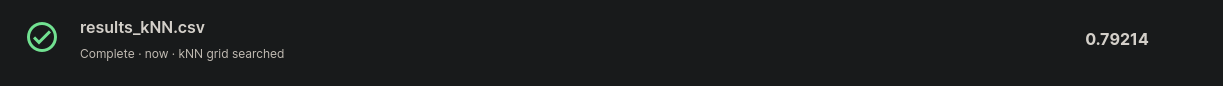

Alright. Now let's try to improve it with a random forest.

We will now build our random forest, and perform a grid search to find the best parameters for it. I decided to search for optimal values for the max depth, criterion and class weight parameters.

In [63]:
dec = RandomForestClassifier(n_jobs=-1, random_state=0)

In [64]:
dec.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [65]:
scores = cross_val_score(dec,x_train,y_train, scoring='accuracy', n_jobs=-1)
print(scores)
print(np.mean(scores))

[0.62104658 0.73720529 0.79643473 0.81875719 0.7543153 ]
0.7455518197236483


We have poor scores with default parameters, let's try grid searching

In [66]:
gs = GridSearchCV(
    dec,
    {
        "max_depth":[1,2,3,4,5,10],
        "criterion":["gini","entropy","log_loss"],
        "class_weight":["balanced", "balanced_subsample"],
    },
    scoring="accuracy"
)

In [67]:
#This cell takes a minute to run
gs.fit(x_train,y_train)
gs.score(x_train,y_train)

0.7978833544230991

In [68]:
gs.best_params_

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 4}

We managed to imporve our model. Let's now build it with the optimal parameters

In [69]:
better_rf = RandomForestClassifier(**gs.best_params_)
better_rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=4)

In [70]:
pred = better_rf.predict(df_test)

In [71]:
pred

array([1, 0, 1, ..., 1, 0, 1])

We'll now write our results to a csv file and upload it to Kaggle

In [72]:
results = pd.DataFrame(np.vectorize(lambda x:bool(x))(pred), index=df_test.index)
results.columns = ['Transported']
results.to_csv('data/results_rf.csv')

In [73]:
results

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


# Results

I submitted the results to Kaggle and I got a score of 0.79541, which placed me at the 1155th place out of 2756 teams. My objective is to improve the model so that I can get into at least the top 25%. I think I need to do a correlation study on the features to see if some are irrelevant. I also think I should try other ensemble models. And maybe some better feature engineering. 

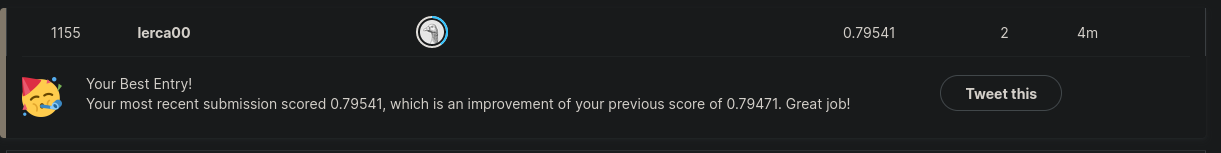